In [74]:
import pickle as pkl
import numpy as np
import pandas as pd
import json
import sklearn
from sklearn import * 
from pytorch_v2 import TorchGame
from matplotlib import pyplot as plt
import torch
import numpy as np

params_test = {
        "Horizon": 3, "Max_actions_chosen": 2, "N_actions_startpoint": 8, "I": .5, "D": 5,
        "Players_action_length": [5, 5], "Max_optim_iter": 75, "Filter_actions": True,
        "Stochastic_state_update": True, "base_params": "paper", "NumRepsBattle": 8,
        "DEVICE": "cpu", "MultiProcess": False
    }

game = TorchGame(**params_test) 
df = pd.read_pickle("saved_runs/2023-04-25.44/History.pkl")
df = df.loc[1:,:]
# game.Initialact

          PlayerA_y  PlayerB_y
sen_tec           4          4
col_sys           2          2
tec_mob           3          3
cont_alg          5          5
loc_map           3          3
sen_fus           3          3
ai_ml             2          2
edg_com           2          2
com_net           4          4
ene_mgm           4          4
sim_mod           2          2
hum_man           3          3
cyb_sec           3          3
eth_reg           2          2
          sen_tec  col_sys  tec_mob  cont_alg  loc_map  sen_fus  ai_ml   
A,B             0        0        0         0        0        0      0  \
Phi, Psi        9        3        1         3        3        9      3   
n_a,n_b         3        3        1         3        1        3      9   
p_a,p_b         9        1        1         3        9        3      1   
n_y,n_z         9        9        9         3        3        9      3   
p_y,p_z         9        3        3         3        3        3      9   
u,v             0

In [89]:
plt.style.use('bmh')
plt.rcParams["figure.facecolor"] = "D1E2FF"
plt.rcParams["axes.facecolor"] = "F2F8FF"

# display(plt.rcParams.keys())

In [90]:
nParams, nTech = game.PARAMCONVERSIONMATRIX.size()
print(nParams, nTech)

8 14


In [91]:
def plot_trl(state, action):
    nParams, nTech = game.PARAMCONVERSIONMATRIX.size()
    print(nParams, nTech)
    
    # act_norm = game.normAction(action)
    new_state = game.Update_State(game.stack_var(state), action, False)

    state_A = state[:nTech].numpy()
    trl_A = game.TechnologyReadiness(state[:nTech]).numpy()

    new_state_A = new_state[:,0].numpy()
    new_trl_A = game.TechnologyReadiness(new_state)[:,0].numpy()
    # new_theta_A = game.techToParams(new_state)[:,0].numpy()
    
    state_B = state[nTech:].numpy()
    trl_B = game.TechnologyReadiness(state[nTech:]).numpy()

    new_state_B = new_state[:,1].numpy()
    new_trl_B = game.TechnologyReadiness(new_state)[:,1].numpy()
    # new_theta_B = game.techToParams(new_state)[:,1].numpy()
    
    # display(new_state_A)
    
    state_grid = np.linspace(-1,12,1000)
    trl_base = game.TechnologyReadiness(torch.tensor(state_grid)).numpy()
    
    r, c = int(nTech/2), 2
    fig, axs = plt.subplots(r, c)
    fig.set_size_inches(16,28)
    for i in range(r):
        for j in range(c):
            k = 2*i + j
            # print(i,j,"-",k)
            # print(r,c)
            axs[i][j].plot(state_grid, trl_base)
            
            #old states
            s = state_A[k]
            t = trl_A[k]
            axs[i][j].scatter(s, t, color="blue", alpha = .3)
            axs[i][j].scatter(state_B[k], trl_B[k], color="red", alpha = .3)
            #new states
            axs[i][j].scatter(new_state_A[k], new_trl_A[k], color="blue", alpha = 1)
            axs[i][j].scatter(new_state_B[k], new_trl_B[k], color="red", alpha = 1)
            axs[i][j].set_title(game.TechnologyNames[k])
    fig.show()

def plot_act_theta(state, action):
    nParams, nTech = game.PARAMCONVERSIONMATRIX.size()
    
    action = game.stack_var(action)
    theta = game.techToParams(game.stack_var(state))
    
    theta_A = theta[:,0].numpy()
    action_A = action[:,0].numpy()
   
    theta_B = theta[:,1].numpy()
    action_B = action[:,1].numpy()
    
    fig, axs = plt.subplots(1,2)
    fig.set_size_inches(16,4)
    
    width = .5
    r = np.arange(nTech)
    axs[0].set_title("actions of each player")
    axs[0].bar(r, action_A, color="blue", width= width, label="Player1")
    axs[0].bar(r+width, action_B, color="red", width= width, label="Player2")
    # axs[1].xticks(r + width/2 , labels = game.ParamNames)
    axs[0].set_xticks(r + width/2)
    axs[0].set_xticklabels(labels = game.TechnologyNames)
    axs[0].legend()
    
    
    
    # width = .5
    r = np.arange(nParams)
    axs[1].set_title("battle Parameters of each player")
    axs[1].bar(r, theta_A, color="blue", width= width, label="Player1")
    axs[1].bar(r+width, theta_B, color="red", width= width, label="Player2")
    # axs[1].xticks(r + width/2 , labels = game.ParamNames)
    axs[1].set_xticks(r + width/2)
    axs[1].set_xticklabels(labels = game.ParamNames)
    axs[1].legend()



    # fig.show()
    fig.autofmt_xdate()
    
    
# df.Action[9]

Index(['Node_id', 'Parent_id', 'Time', 'State', 'Action', 'Reward'], dtype='object')
8 14


C:\Users\IsakG\AppData\Local\Temp\ipykernel_24784\1458929375.py:46: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


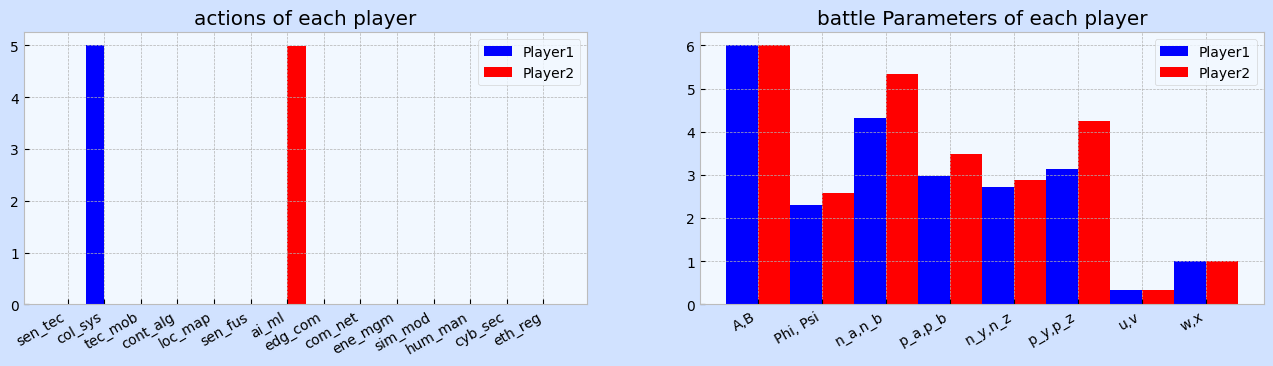

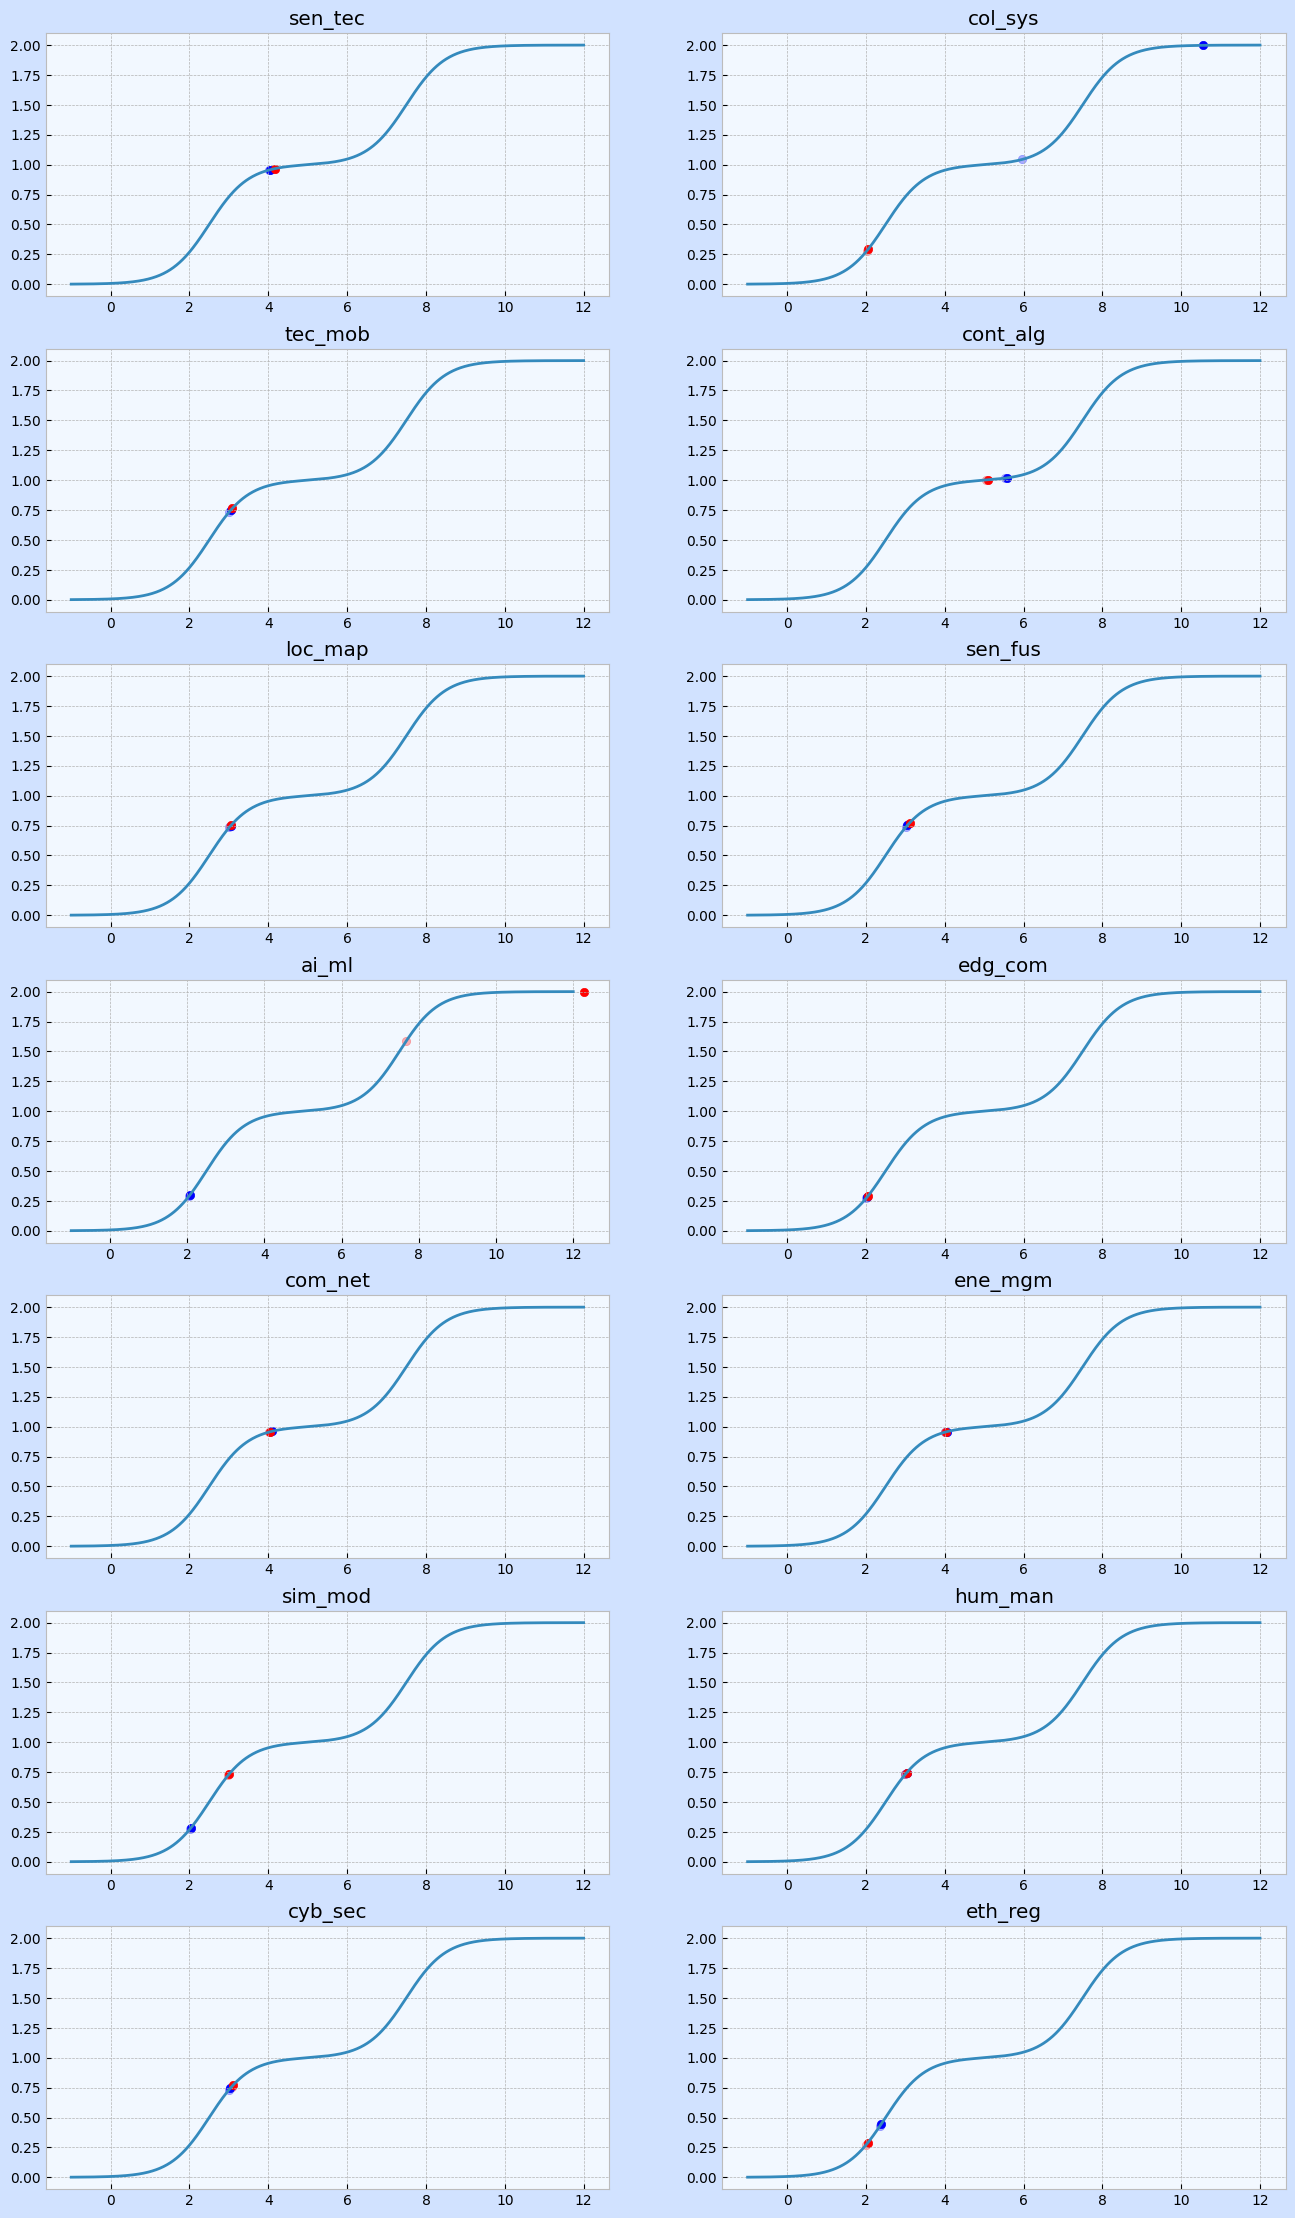

In [92]:

print(df.columns)
numPoints = len(df.index)
states =df.State
actions = df.Action

plot_ind = 3
stat =  torch.tensor(states[plot_ind])
act = torch.tensor(actions[plot_ind])
plot_act_theta(stat, act)
plot_trl(stat, act)


In [93]:
# (.values.astype(np.float32))

acts = torch.tensor(df.Action.dropna().values.tolist())
# Vals.shape
# Vals[:,game.N_Technologies:]

C:\Users\IsakG\AppData\Local\Temp\ipykernel_24784\3731987362.py:63: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\IsakG\AppData\Local\Temp\ipykernel_24784\3731987362.py:63: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\IsakG\AppData\Local\Temp\ipykernel_24784\3731987362.py:63: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\IsakG\AppData\Local\Temp\ipykernel_24784\3731987362.py:63: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


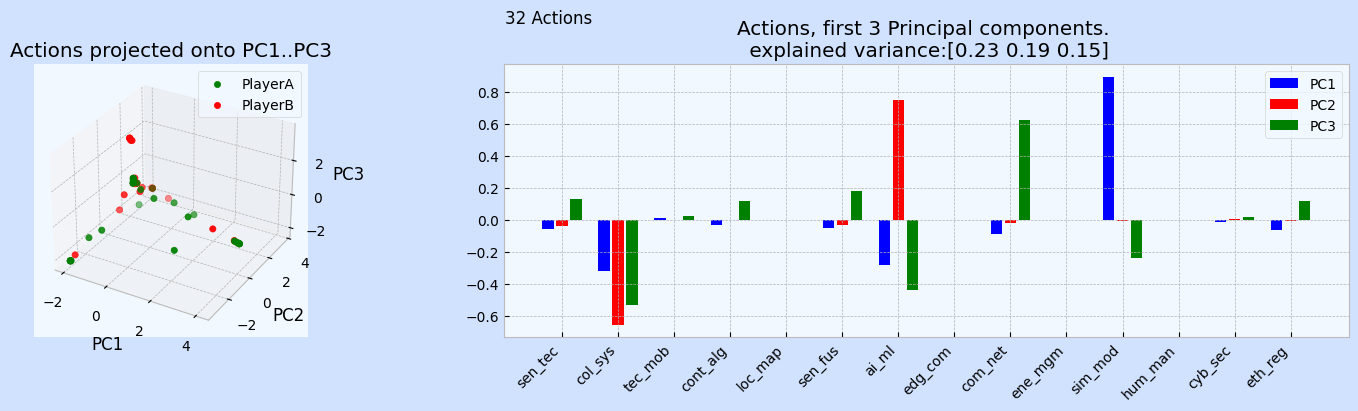

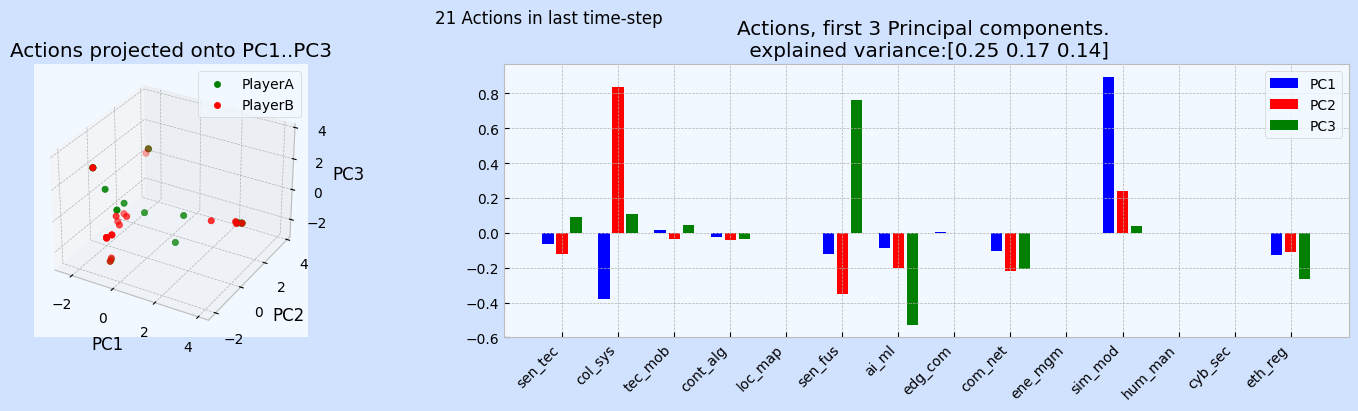

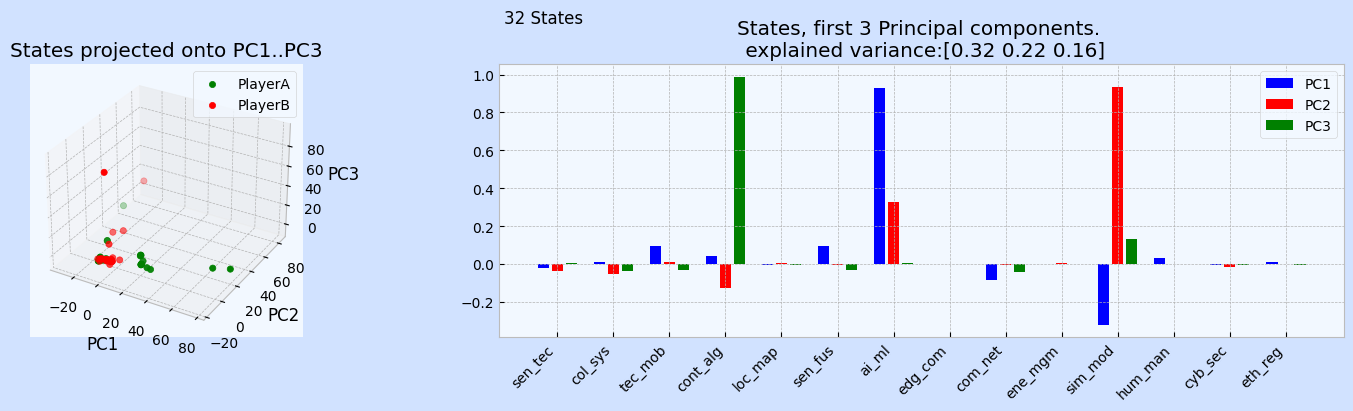

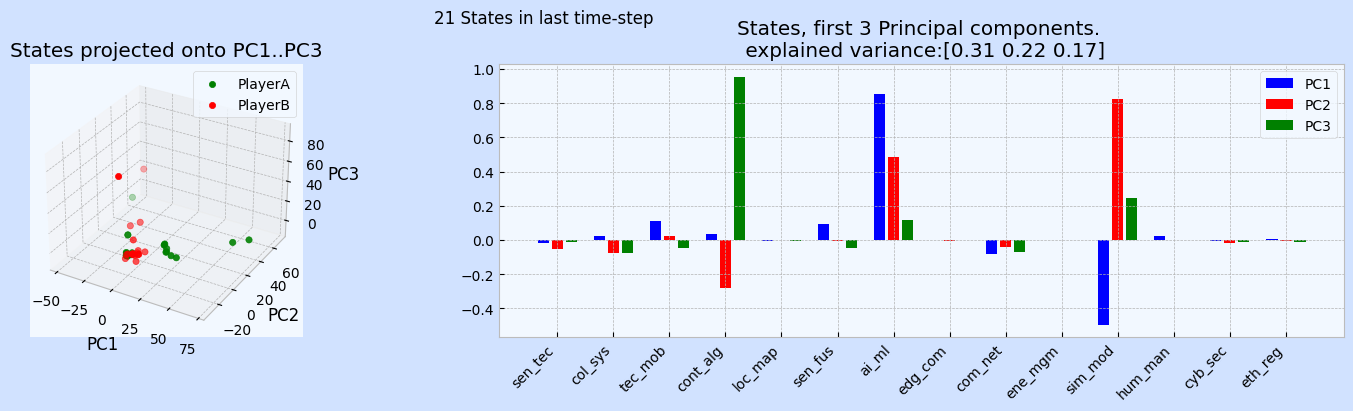

In [94]:
# num
def pca_plot(df, key, t_max):
    if t_max:
        df = df[df.Time == df.Time.max()]
    if key == "theta":
        key = "State"
        theta = True
    else: 
        theta = False
        
    vals = torch.tensor(getattr(df, key).dropna().values.tolist())
    
    # print(vals)
    numVals = vals.shape[0]
    valsA, valsB = (vals[:,:game.N_Technologies]).numpy(), (vals[:,game.N_Technologies:]).numpy()
    allVals = np.concatenate((valsA,valsB),0)
    
    if theta:
        allThetas = []
        for i in range(numVals):
            game.techToParams()
    
    pca = sklearn.decomposition.PCA(3)
    pca_fit_AB = pca.fit_transform(allVals)
    
    pca_fit_A = pca_fit_AB[:numVals,:]
    pca_fit_B = pca_fit_AB[numVals:,:]

    fig = plt.figure(figsize=(16,4))
    # fix , axs = plt.subplots(1,2,width_ratios=(1,3))
    # ax = axs[0]
    if t_max:
        fig.suptitle(f"{numVals} {key}s in last time-step")
    else:
        fig.suptitle(f"{numVals} {key}s")
        
    ax = fig.add_subplot(1,2, 1 ,projection='3d')

    ax.scatter(pca_fit_A[:,0], pca_fit_A[:,1], pca_fit_A[:,2], color="green", label="PlayerA")
    ax.scatter(pca_fit_B[:,0], pca_fit_B[:,1], pca_fit_B[:,2], color="red", label="PlayerB")

    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    
    ax.set_title(f"{key}s projected onto PC1..PC3")
    
    ax.legend()
    
    
    components = pca.components_
    var = pca.explained_variance_ratio_
    _
    nTech = np.shape(components[0])[0]
    nComps = len(components)
   
    ax2 = fig.add_subplot(1,2,2 )
    ax2.set_title(f"{key}s, first {nComps} Principal components. \n explained variance:{np.round(var,2)}")
    
   
    width = .5
    r = np.arange(nTech)
    
    ax2.bar(r, components[0], color="blue", width=1/5, label="PC1")
    ax2.bar(r + width/2, components[1], color="red", width=1/5, label="PC2")
    ax2.bar(r + width, components[2], color="green", width=1/5, label="PC3")
    ax2.set_xticks(r + width/2, game.TechnologyNames, rotation = 45, ha="right")
    # ax2.set_xticklabels(labels = game.TechnologyNames)
    # ax2.set_x
    ax2.legend()
    
    
    fig.tight_layout(h_pad = 0, pad=0)
    fig.show()
    

pca_plot(df,"Action", False)
pca_plot(df,"Action", True)
pca_plot(df,"State", False)
pca_plot(df,"State", True)


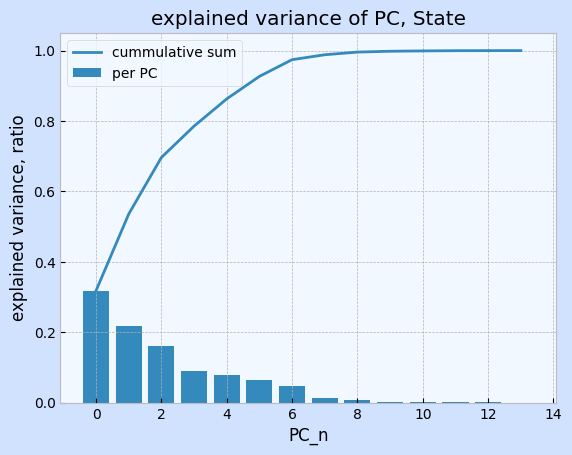

In [99]:
def all_pca_plot(df, key, t_max=False):
    if t_max:
        df = df[df.Time == df.Time.max()]
    vals = torch.tensor(getattr(df, key).dropna().values.tolist())
    
    # print(vals)
    numVals = vals.shape[0]
    valsA, valsB = (vals[:,:game.N_Technologies]).numpy(), (vals[:,game.N_Technologies:]).numpy()

    # print(valsA, valsB)
    pca = sklearn.decomposition.PCA()
    pca_fit_AB = pca.fit_transform(np.concatenate((valsA,valsB),0))
    
    evr = pca.explained_variance_ratio_
    
    fig, ax = plt.subplots(1,1)
    ax.set_title(f"explained variance of PC, {key}")
    ax.bar(range(pca.n_components_),evr, label="per PC")
    ax.plot(range(pca.n_components_),np.cumsum(evr), label ="cummulative sum")
    
    ax.set_xlabel("PC_n")
    ax.set_ylabel("explained variance, ratio")
    ax.legend(loc="best")    
all_pca_plot(df, "State", False)